# Probar el ambiente de trabajo #

Para instalar Python3, IPython, Jupyter y librerías de Ciencias de los Datos, pueden referise a: https://github.com/magister-informatica-uach/INFO147/blob/master/unidad1/clase1.ipynb

Además necesitamos instalar las librerías spaCy, SciKit-Learn, Gensim y OpenCV3. Desde un terminal:
- Spacy:

`pip3 install spacy --user`

`python3 -m spacy download es_core_news_sm` #instala modelos para el lenguaje español

- SciKit-Learn:

`pip3 install -U scikit-learn`

- Gensim:

`pip3 install -U gensim`

- OpenCV3:

Para Ubuntu version >= 17.x

`pip3 install python3-opencv --user`

Para versiones anteriores: https://www.pyimagesearch.com/2016/10/24/ubuntu-16-04-how-to-install-opencv/


<b>Verificar qué versión de Python está utilizada por Jupyter:</b>

In [1]:
import sys
print(sys.version_info)
print(sys.version)

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]


<b>Probar la instalación de la librería spaCy:</b>

In [3]:
import spacy

nlp = spacy.load('es_core_news_sm')
doc = nlp(u'Cuprum confirma que sus sistemas de seguridad fueron hackeados traspasando los fondos de algunos clientes')

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


Cuprum Cuprum PROPN PROPN___ nsubj Xxxxx True False
confirma confirmar VERB VERB__Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin ROOT xxxx True False
que que SCONJ SCONJ___ mark xxx True True
sus su DET DET__Number=Plur|Person=3|Poss=Yes|PronType=Prs det xxx True True
sistemas sistema NOUN NOUN__Gender=Masc|Number=Plur nsubj xxxx True False
de de ADP ADP__AdpType=Prep case xx True True
seguridad seguridad NOUN NOUN__Gender=Fem|Number=Sing nmod xxxx True False
fueron ser AUX AUX__Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin aux xxxx True True
hackeados hackeados VERB VERB__Gender=Masc|Number=Plur|Tense=Past|VerbForm=Part aux xxxx True False
traspasando traspasar VERB VERB__VerbForm=Ger ccomp xxxx True False
los lo DET DET__Definite=Def|Gender=Masc|Number=Plur|PronType=Art det xxx True True
fondos fondo NOUN NOUN__Gender=Masc|Number=Plur obj xxxx True False
de de ADP ADP__AdpType=Prep case xx True True
algunos alguno DET DET__Gender=Masc|Number=Plur|PronType=Ind det xxxx 

<b>Probar la instalación de Scikit-Learn:</b>

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

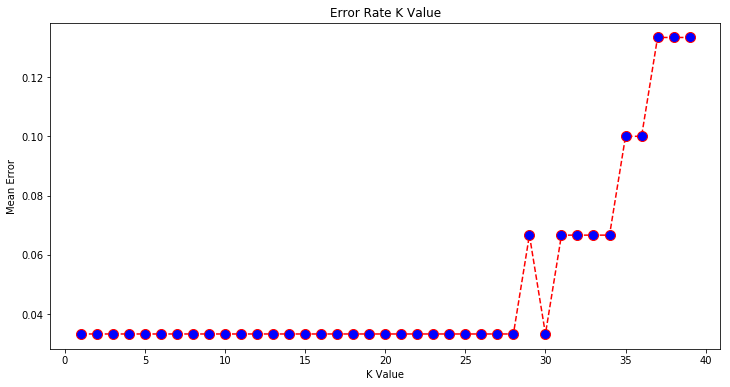

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

<b>Probar la instalación de Gensim:</b>

In [4]:
from gensim import models

corpus = [[(0, 1.0), (1, 1.0), (2, 1.0)],
[(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (8, 1.0)],
[(1, 1.0), (3, 1.0), (4, 1.0), (7, 1.0)],
[(0, 1.0), (4, 2.0), (7, 1.0)],
[(3, 1.0), (5, 1.0), (6, 1.0)],
[(9, 1.0)],
[(9, 1.0), (10, 1.0)],
[(9, 1.0), (10, 1.0), (11, 1.0)],
[(8, 1.0), (10, 1.0), (11, 1.0)]]

tfidf = models.TfidfModel(corpus)

vec = [(0, 1), (4, 1)]

print(tfidf[vec])

[(0, 0.8075244024440723), (4, 0.5898341626740045)]


<b>Probar la instalación de OpenCV3:</b>

In [ ]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

img = cv2.imread("./input.jpg")

plt.imshow(img)

#cv2.imshow('Input',img)
#cv2.waitKey()